In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from os.path import join, abspath
import sys
from os import pardir, mkdir
from tqdm import tqdm

In [2]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if sys.path is not root_dir:
    sys.path.append(root_dir)

sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [7]:
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster")
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster'

In [8]:
name = "Velocity-Distribution"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution already exist. Good to go!


In [9]:
files = glob(join(spectral_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Proje

In [10]:
index = 3
gaia_raw = vaex.open(files[index])
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,TD_D,TD
0,0.0032882177640498373,-1.2621910830881986,7.800000190734863,7.5970001220703125,AAA,4701758461948318848,20.87449836730957,-16.354367148195085,0.01471635326743126,12.9722529499503,0.016420288011431694,8.410454649576556,0.012681514024734497,8.464082717895508,8.652515411376953,8.128384590148926,1851.48095703125,3608.023681640625,0.9388912916183472,1.18311607837677,2.238763800213232,-0.7728458234774394,118.52539825439453,117.81610107421875,118.82469940185547,0.002099999925121665,0.0003000000142492354,0.01730000041425228,nan,nan,nan,F,--,-1.0309404134750366,apogee,0.07304781675338745,0.07304781675338745,1.0,6724.49755859375,gspphot,3.4951171875,30.11328125,0.0,4.15500020980835,gspphot,0.0029001235961914062,0.013399600982666016,0.0,-0.10700999945402145,apogee,0.005179196130484343,0.005179196130484343,1.0,-0.09715799987316132,apogee,0.0066741290502250195,0.0066741290502250195,1.0,0.699999988079071,gspspec,0.039999961853027344,0.030000030994415283,0.0,-0.036324698477983475,apogee,0.01035263016819954,0.01035263016819954,1.0,0.20300006866455078,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.07304781675338745,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.240385966479094,2.847701908629568,-0.09715799987316132,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,0.010437782596069159,0.010437782596069159
1,0.007063225309773412,-0.6865562757727774,7.965000152587891,7.747000217437744,AAA,2306327795058190464,33.877784729003906,-18.65352529464736,0.016239916905760765,-28.27985694809211,0.014973348006606102,6.534204759850618,0.017997020855545998,8.606897354125977,8.791441917419434,8.273673057556152,2892.259521484375,3193.36474609375,0.8631702065467834,1.1839995384216309,2.7948043176456325,-1.291263952550134,151.07460021972656,149.65220642089844,152.12989807128906,0.001500000013038516,0.00019999999494757503,0.006399999838322401,nan,nan,nan,F,--,16.841947555541992,gaia,0.35437488555908203,0.35437488555908203,1.0,6727.11181640625,gspphot,3.62939453125,8.5029296875,0.0,4.043099880218506,gspphot,0.00839996337890625,0.01640033721923828,0.0,nan,--,nan,nan,nan,-0.24660000205039978,gspphot,0.025400012731552124,0.07639999687671661,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.21799993515014648,2.040963850943312,153.04081165997337,-147.10046586725971,42.22490941587206,-6.2742988244767695,33.291703008163644,0.01563973453247568,0.015599190856792443,24.15024904458355,-4.5514607394549715,0.06747218432377954,-0.016907581538752773,-9.525016480523199,0.35437488555908203,0.34112800354569406,27.859644423875856,0.11732749195889042,-27.748082154063333,0.11049242050152615,-5.188402360934332,0.04293054500663824,1.3969140817832524,2.9676289618954823,-0.24660000205039978,-5.188402360934332,-27.748082154063333,-2.275016480523199,4.530297247865866e-06,6.316667044489587e-07,4.999215314159594e-09,0.139431624436

filter out high error data

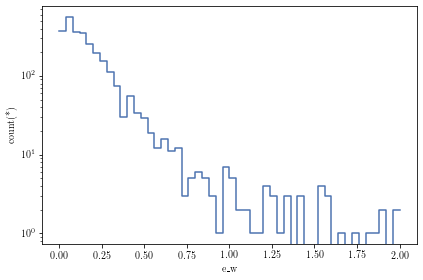

In [11]:
gaia_raw.viz.histogram("e_w", limits=[0, 2], shape=50)
plt.yscale("log")

In [12]:
# only consider stars near the midplane
gaia = gaia_raw.filter("abs(z)<50")
gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
# either the relative error is less than 10% or the absolute error is less than 1 km/s
mask = (gaia['f']<0.1) | (gaia['e_w']<1) 
gaia = gaia[mask]
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,TD_D,TD,f
0,0.005716319819424347,1.1665234083208373,8.01200008392334,7.783999919891357,AAA,528458312316812928,39.76316833496094,39.45984294089567,0.014046450145542622,4.902062168852253,0.014188536442816257,8.278275845981788,0.013683087192475796,8.82093334197998,9.042384147644043,8.438525199890137,3203.848388671875,2771.24072265625,0.920624852180481,1.190063714981079,-1.0817356511856202,0.07756770439903354,120.29750061035156,119.99469757080078,120.53970336914062,0.0007999999797903001,0.00019999999494757503,0.0026000000070780516,-0.05999999865889549,-0.18000000715255737,0.07000000029802322,F,--,-27.507999420166016,gaia,0.25584477186203003,0.25584477186203003,1.0,6394.578125,gspphot,1.48828125,3.560546875,0.0,4.114200115203857,gspphot,0.002300262451171875,0.00279998779296875,0.0,nan,--,nan,nan,nan,-0.4927000105381012,gspphot,0.0067999958992004395,0.006900012493133545,0.0,0.05999999865889549,gspspec,0.019999999552965164,0.010000001639127731,0.0,nan,--,nan,nan,nan,0.22800016403198242,2.601699552541188,120.79810078875208,9.36063801281595,120.43487705047292,39.66204716756458,-2.8339782824376725,0.014051806885207813,0.014183231343426844,-1.622687780484492,22.709813863657242,-0.008552525542313312,0.038389452947753096,-3.7494018979233212,0.25584477186203003,0.021581307638461663,-27.299544559216304,0.2550763417937857,-32.872886445055556,0.12453386881434614,-13.430343094391826,0.22589600651330508,1.4982425034932718,3.047913768779282,-0.4927000105381012,-13.430343094391826,-32.872886445055556,3.5005981020766788,3.4492946697142315e-06,6.546253153260348e-07,5.61736041762304e-09,0.18978526858659758,0.0200949107915221,0.0200949107915221,0.005755933406449409
1,0.02982221403602435,-0.40330286447580066,5.451000213623047,5.239999771118164,AAA,2337191189529102336,107.86874389648438,96.96909987608564,0.03529655933380127,-47.251033207084504,0.022444535046815872,25.162805081468484,0.03420259431004524,6.094202041625977,6.285860538482666,5.757535934448242,632.8350830078125,717.2827758789062,0.9329802393913269,1.1818196773529053,-2.230434955233791,-1.3812340518322743,39.75230026245117,39.654300689697266,39.86920166015625,0.0,0.0,0.0003000000142492354,nan,nan,nan,F,--,6.062251567840576,gaia,0.4873451590538025,0.4873451590538025,1.0,6698.20947265625,gspphot,4.0361328125,5.9599609375,0.0,4.165599822998047,gspphot,0.008299827575683594,0.025700092315673828,0.0,nan,--,nan,nan,nan,-0.20819999277591705,gspphot,0.06939999759197235,0.14819999411702156,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.2110004425048828,2.4547954808552523,39.74119724578976,-39.02930560103515,7.488395210575788,-3.6834917352416685,-107.80583638445407,0.02503472392128757,0.03350920548830144,-20.30773845792914,-0.6938714014004742,-0.02831586949206459,-0.004809260039032296,-9.780224739423614,0.4873451590538025,0.4786449912192083,-18.801657889500227,0.09594824072921664,12.070551750767939,0.05892277123216636,-14.432102319049733,0.07587687995349128,1.3245751173893412,2.911665979221922,-0.20819999277591705,-14.432102319049733,12.070551750767939,-2.5302247394236144,2.057494407823743e-06,2.1601661027546299e-07,1.7554120781310067e-09,0.10499013239309288,0.011116602253386303,0.011116602253386303,0.04894008102797612
2,0.032926037764600

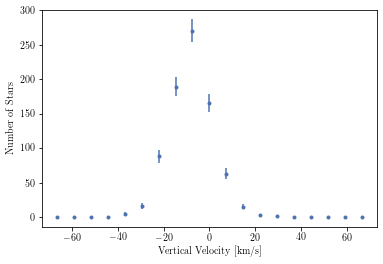

In [13]:
ws = gaia['w'].to_numpy()
wedge = np.linspace(-70, 70, 20)
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
werr = np.sqrt(wnum)
area = wnum.sum() * (wedge[1] - wedge[0])
plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.show()

In [14]:
# fit with double gaussian
from scipy.stats import norm
from scipy.optimize import curve_fit

def gaussian(x, mu, sigma, a):
    return abs(a)*norm.pdf(x, mu, sigma)

def double_gaussian(x, mu, sigma1, a1, sigma2, a2):
    return abs(a1)*norm.pdf(x, mu, sigma1) + abs(a2)*norm.pdf(x, mu, sigma2)

In [15]:
# index = int(input("Index: "))
def get_fit(index, wedge):
    name = files[index].split("/")[-1]
    gaia_raw = vaex.open(files[index])
    gaia = gaia_raw.filter("abs(z)<50")
    gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
    mask = (gaia['f']<0.1) | (gaia['e_w']<1)
    gaia = gaia[mask]
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wmid = wmid[mask]
    wnum = wnum[mask]
    print(len(ws), index)
    area = wnum.sum() * (wedge[1] - wedge[0])

    popt1, _ = curve_fit(gaussian, wmid, wnum/area, p0=[0, 10, 1])
    popt2 = None
    for i in range(100):
        # p0 = np.array([popt1[0], popt1[1]*0.8, popt1[2]*0.8, popt1[1]*1.2, popt1[2]/1.2])
        p0 = [popt1[0], popt1[1], 0.9, 50, 0.07]
        # noise = np.random.normal(0, 0.1, size=len(p0))
        popt, _ = curve_fit(double_gaussian, wmid, wnum/area, p0=p0, maxfev=5000)
        if popt[1] > 1 and popt[3] > 1:
            popt2 = popt
            break
        print('failed to fit', i)
        if i == 99:
            rnd = 0.5
            popt2 = np.array([popt1[0], popt1[1], rnd*popt1[2], popt1[1], (1-rnd)*popt1[2]])

    ws = np.linspace(np.min(wedge),np.max(wedge), 1000)
    fw1 = gaussian(ws, *popt1)
    fw2 = double_gaussian(ws, *popt2)

    werr = np.sqrt(wnum)
    plt.figure(figsize=(10, 6))
    plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
    plt.plot(ws, fw2, label="Double Gaussian")
    plt.plot(ws, fw1, label="Gaussian")
    plt.plot(ws, gaussian(ws, popt2[0], popt2[1], popt2[2]), label="Gaussian 1", ls="--")
    plt.plot(ws, gaussian(ws, popt2[0], popt2[3], popt2[4]), label="Gaussian 2", ls="--")
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.ylim(-0.01, np.max(wnum/area)*1.2)
    plt.legend()
    # plt.yscale("log")
    plt.show()
    print("1: mu={:.2f}, sigma={:.2f}, a={:.2f}".format(*popt1))
    print("2: mu={:.2f}, sigma1={:.2f}, a1={:.2f}, sigma2={:.2f}, a2={:.2f}".format(*popt2))

    dic = {
            "mu": popt1[0],
            "sigma": popt1[1],
            "a": abs(popt1[2]),
            "mu_2": popt2[0],
            "sigma1_2": popt2[1],
            "a1_2": abs(popt2[2]),
            "sigma2_2": popt2[3],
            "a2_2": popt2[4],
        }
    df_fit = pd.DataFrame(dic, index=[index])
    df = pd.DataFrame({"wmid": wmid, "wnum": wnum/area, "werr": werr/area})
    return df, df_fit, name

423 0


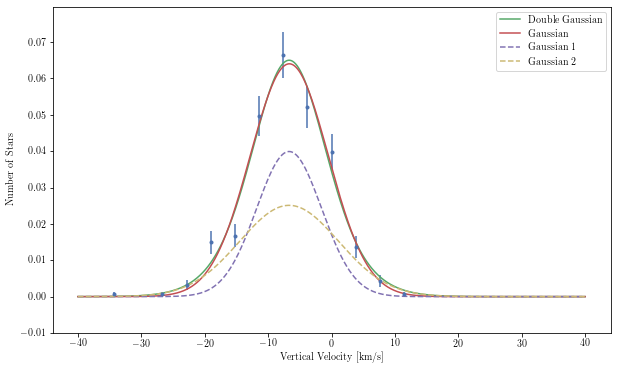

1: mu=-6.66, sigma=6.15, a=0.99
2: mu=-6.69, sigma1=5.13, a1=0.51, sigma2=7.80, a2=0.49
export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [16]:
wedge = np.linspace(-40, 40, 22)
df, df_fit, name = get_fit(0, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)


305 1


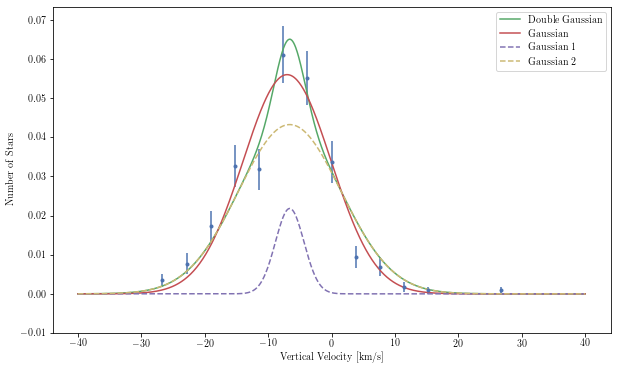

1: mu=-7.00, sigma=6.94, a=0.97
2: mu=-6.59, sigma1=2.26, a1=0.12, sigma2=8.09, a2=0.88
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [51]:
wedge = np.linspace(-40, 40, 22)
df, df_fit, name = get_fit(1, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)

462 2


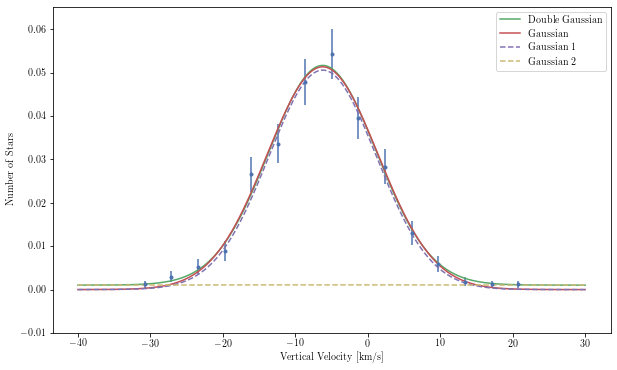

1: mu=-6.23, sigma=7.65, a=0.98
2: mu=-6.22, sigma1=7.43, a1=0.94, sigma2=100.12, a2=0.27
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [52]:
wedge = np.linspace(-40, 30, 20)
df, df_fit, name = get_fit(2, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)

815 3


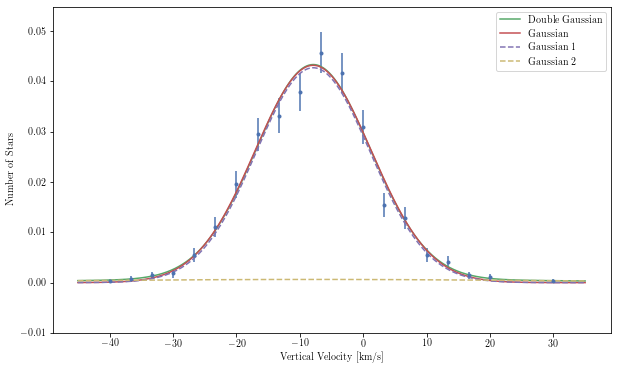

1: mu=-7.89, sigma=9.17, a=0.99
2: mu=-7.88, sigma1=9.01, a1=0.96, sigma2=37.60, a2=0.06
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [60]:
wedge = np.linspace(-45, 35, 25)
df, df_fit, name = get_fit(3, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)

1305 4


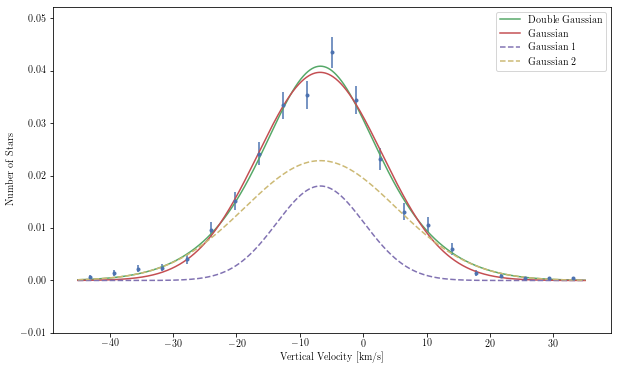

1: mu=-6.80, sigma=9.80, a=0.97
2: mu=-6.75, sigma1=6.92, a1=0.31, sigma2=11.97, a2=0.68
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.23)_(0.26).hdf5'

In [64]:
wedge = np.linspace(-45, 35, 22)
df, df_fit, name = get_fit(4, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1127 5


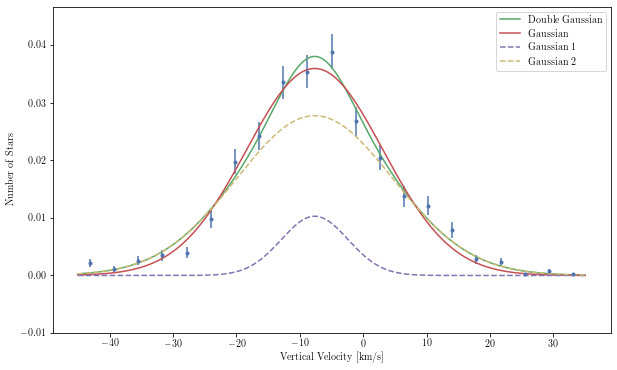

1: mu=-7.65, sigma=10.76, a=0.97
2: mu=-7.65, sigma1=5.26, a1=0.14, sigma2=12.32, a2=0.86
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.26)_(0.28).hdf5'

In [66]:
wedge = np.linspace(-45, 35, 22)
df, df_fit, name = get_fit(5, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1435 6


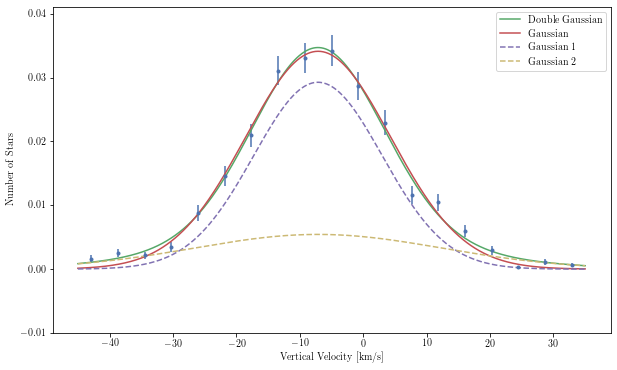

1: mu=-7.11, sigma=11.43, a=0.98
2: mu=-7.14, sigma1=10.15, a1=0.74, sigma2=19.54, a2=0.27
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.28)_(0.30).hdf5'

In [71]:
wedge = np.linspace(-45, 35, 20)
df, df_fit, name = get_fit(6, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1552 7


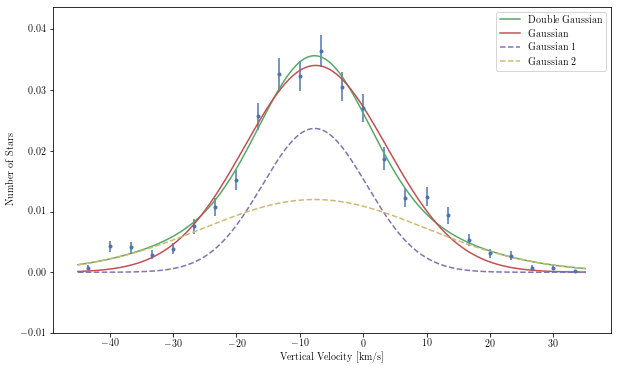

1: mu=-7.51, sigma=11.23, a=0.96
2: mu=-7.68, sigma1=8.23, a1=0.49, sigma2=17.50, a2=0.53
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.30)_(0.32).hdf5'

In [74]:
wedge = np.linspace(-45, 35, 25)
df, df_fit, name = get_fit(7, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1699 8


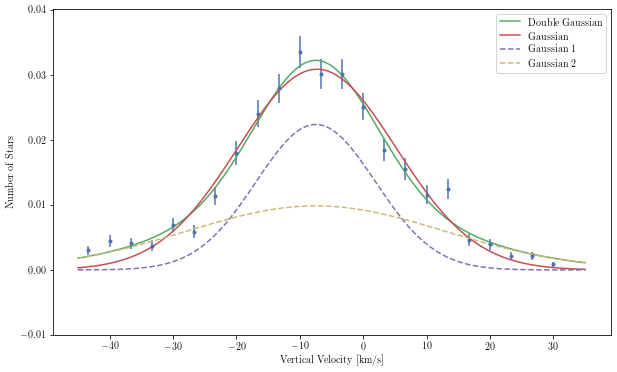

1: mu=-7.29, sigma=12.52, a=0.97
2: mu=-7.48, sigma1=9.41, a1=0.53, sigma2=20.33, a2=0.50
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.32)_(0.34).hdf5'

In [76]:
wedge = np.linspace(-45, 35, 25)
df, df_fit, name = get_fit(8, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1945 9


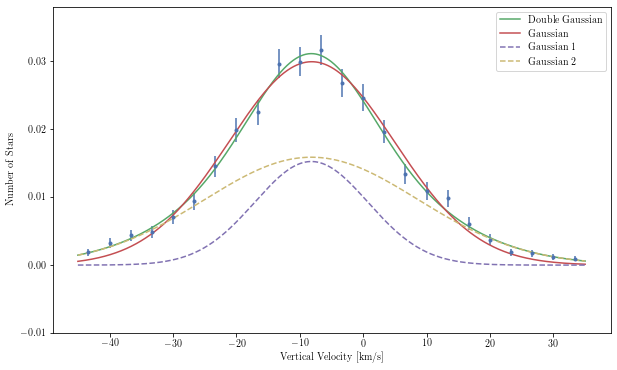

1: mu=-8.12, sigma=13.05, a=0.98
2: mu=-8.18, sigma1=8.93, a1=0.34, sigma2=16.85, a2=0.67
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.34)_(0.36).hdf5'

In [78]:
wedge = np.linspace(-45, 35, 25)
df, df_fit, name = get_fit(9, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1022 10


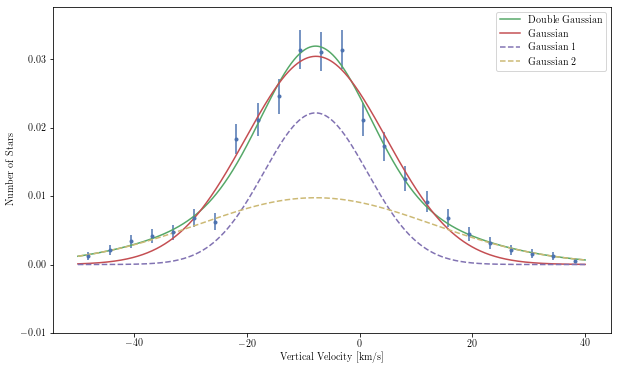

1: mu=-7.76, sigma=12.47, a=0.95
2: mu=-7.82, sigma1=9.21, a1=0.51, sigma2=20.63, a2=0.50
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.36)_(0.37).hdf5'

In [80]:
wedge = np.linspace(-50, 40, 25)
df, df_fit, name = get_fit(10, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1890 11


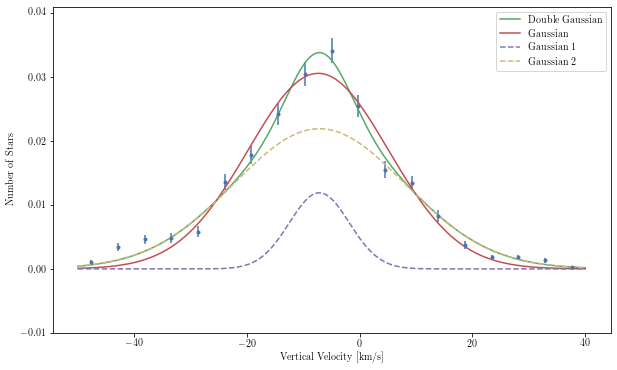

1: mu=-7.35, sigma=12.47, a=0.95
2: mu=-7.16, sigma1=5.31, a1=0.16, sigma2=15.22, a2=0.83
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.37)_(0.39).hdf5'

In [84]:
wedge = np.linspace(-50, 40, 20)
df, df_fit, name = get_fit(11, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

904 12


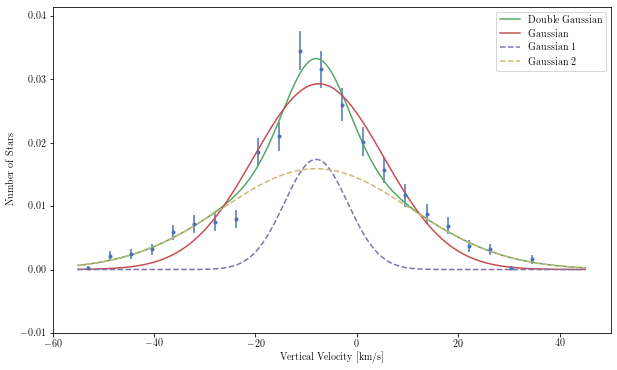

1: mu=-7.52, sigma=12.79, a=0.94
2: mu=-8.05, sigma1=6.24, a1=0.27, sigma2=18.58, a2=0.74
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'gaia_(0.39)_(0.40).hdf5'

In [87]:
wedge = np.linspace(-55, 45, 25)
df, df_fit, name = get_fit(12, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_({n[1]})_({n[2]})"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

In [91]:
fit_files = glob(join(data_dir, "fit_*"))
fit_files.sort()
fit_files

['/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/fit_gaia_(0.36)_(0.37).hdf5'

In [92]:
df = vaex.open_many(fit_files)
df

#,mu,sigma,a,mu_2,sigma1_2,a1_2,sigma2_2,a2_2
0,-6.658897146317167,6.1499377005748315,0.9868152291798222,-6.6862066227352495,5.131361959076712,0.5132063845140845,7.795319746778745,0.4903947627278492
1,-7.00331677915539,6.938758932149491,0.9740570898002118,-6.592732250239681,2.255327822650919,0.12330643573276606,8.09280607303967,0.8772186522060442
2,-6.2286631396226735,7.653295087781057,0.984532335520383,-6.221545492591697,7.425999648431581,0.9412307928516649,100.11909268897783,0.2711723874747925
3,-7.890649023933883,9.169891628875238,0.9920756995509558,-7.8818110329135695,9.005299245376264,0.9633301071301603,37.59939499945716,0.059898084671122113
4,-6.798993988266027,9.803604162572597,0.9744561793765119,-6.751011077994828,6.91989200284663,0.31221244004796334,11.96525540337759,0.6847334939117138
...,...,...,...,...,...,...,...,...
8,-7.290486382753625,12.516995053032021,0.9688160254790265,-7.481013865579511,9.405277497301885,0.5276383933397754,20.33279977121815,0.5021807811049902
9,-8.117619729560497,13.048806583480786,0.9798259949349497,-8.182115890245381,8.93175458797419,0.3416138644939949,16.853392402157137,0.6713337074977334
10,-7.756957329726501,12.470673162358507,0.9508077530650629,-7.820968204176347,9.208063228472614,0.5112796951985306,20.634676560500854,0.5046916873226769
11,-7.349220291587202,12.473455790855663,0.954174108034798,-7.160154189505058,5.312987058946614,0.1581557744933826,15.215138314437487,0.8343484314777653


In [96]:
df = df.to_pandas_df()
df

,mu,sigma,a,mu_2,sigma1_2,a1_2,sigma2_2,a2_2
0,-6.658897,6.149938,0.986815,-6.686207,5.131362,0.513206,7.795320,0.490395
1,-7.003317,6.938759,0.974057,-6.592732,2.255328,0.123306,8.092806,0.877219
2,-6.228663,7.653295,0.984532,-6.221545,7.426000,0.941231,100.119093,0.271172
3,-7.890649,9.169892,0.992076,-7.881811,9.005299,0.963330,37.599395,0.059898
4,-6.798994,9.803604,0.974456,-6.751011,6.919892,0.312212,11.965255,0.684733
5,-7.647824,10.763932,0.971300,-7.652887,5.264142,0.135978,12.321004,0.858204
6,-7.112295,11.428720,0.977470,-7.139303,10.147553,0.744461,19.544803,0.266431
7,-7.508951,11.227437,0.958616,-7.678393,8.233925,0.488791,17.498102,0.525387
8,-7.290486,12.516995,0.968816,-7.481014,9.405277,0.527638,20.332800,0.502181
9,-8.117620,13.048807,0.979826,-8.182116,8.931755,0.341614,16.853392,0.671334


['0.16', '0.20']
['0.39', '0.40']


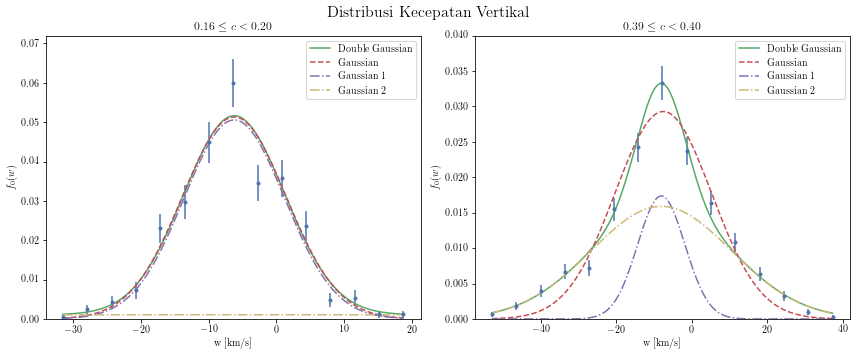

In [99]:
import re

# regex number between ()
regex = re.compile(r'\(([^)]+)\)')

def get_v(index):
    gaia_raw = vaex.open(files[index])
    gaia = gaia_raw.filter("abs(z)<50")
    gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
    mask = (gaia['f']<0.1) | (gaia['e_w']<1)
    gaia = gaia[mask]
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    wmean = np.mean(ws)
    wstd = np.std(ws)
    wedge = np.linspace(wmean-4*wstd, wmean+4*wstd, 20)
    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wmid = wmid[mask]
    wnum = wnum[mask]
    werr = np.sqrt(wnum)

    # print(len(ws), index)
    area = wnum.sum() * (wedge[1] - wedge[0])
    return wmid, wnum/area, werr/area

w12, n12, e12 = get_v(12)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, ax in zip([2, 12], axes):
    wmid, wnum, werr = get_v(i)
    popt1 = df['mu'][i], df['sigma'][i], df['a'][i]
    popt2 = df['mu_2'][i], df['sigma1_2'][i], df['a1_2'][i], df['sigma2_2'][i], df['a2_2'][i]
    ws = np.linspace(np.min(wmid), np.max(wmid), 1000)
    fw1 = gaussian(ws, *popt1)
    fw2 = double_gaussian(ws, *popt2)
    name = files[i].split('/')[-1]
    c = re.findall(regex, name)
    print(c)

    ax.errorbar(wmid, wnum, yerr=werr, fmt='.')
    ax.plot(ws, fw2, label="Double Gaussian")
    ax.plot(ws, fw1, label="Gaussian", ls="--")
    ax.plot(ws, gaussian(ws, popt2[0], popt2[1], popt2[2]), label="Gaussian 1", ls="-.")
    ax.plot(ws, gaussian(ws, popt2[0], popt2[3], popt2[4]), label="Gaussian 2", ls="-.")
    ax.set_xlabel("w [km/s]")
    ax.set_ylabel(r"$f_0(w)$")
    ax.legend()
    ax.set_title(r"${}\leq c<{}$".format(c[0], c[1]))
    ax.set_ylim(0, np.max(wnum)*1.2)
fig.suptitle("Distribusi Kecepatan Vertikal", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig(join("img", "w-dist.pdf"), dpi=300)
plt.show()

